In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
from keras.utils.vis_utils import model_to_dot


print(tf.__version__)

2.4.1


In [8]:
labelNames = ['0', '1', '2', '3','4','5','6','7']
classDic = {0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7}
classNames = ['pocari','letsbe','hotsix', 'cola', '식혜', '사이다', '밀키스', '데자와']


dir = "/content/drive/Shareddrives/TimmyRoom/image_resize"

In [9]:
def sampling(data, per):
    np.random.seed(123)
    N = len(data)
    sample_n = int(len(data)*per)
    sample = data.take(np.random.permutation(N)[:sample_n])
    return sample

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagenerator = ImageDataGenerator(
    #rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,        
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [11]:
import numpy as np
import pandas as pd

x_train = []
y_train = []
x_test = []
y_test = []
fileNames = []

for idx, cat in enumerate(labelNames):

    label = [0 for i in range(len(classNames))]
    label[classDic[idx]] = 1

    imgDir = dir + "/" + cat
    files = glob.glob(imgDir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    
    i = 0
    lst = []
    for i in range(len(files)) :
        lst.append(i)
    lst = pd.DataFrame(lst, columns = ['idx'])

    trainSet = lst.apply(sampling, per=0.95)
    trainSet = trainSet.sort_index()

    testSet = lst.drop(lst.index[trainSet.index])
    testSet = testSet.sort_index()

    trainSet = trainSet['idx'].values.tolist()
    testSet = testSet['idx'].values.tolist()
    
    for f in range(len(trainSet)):
        img = Image.open(files[trainSet[f]])
        img = img.convert("RGB")
        data = np.asarray(img)
        
        if f == 0:
            print(label)
            
        x_train.append(data)
        y_train.append(label)
    
    for f in range(len(testSet)):
        img = Image.open(files[testSet[f]])
        img = img.convert("RGB")
        data = np.asarray(img)
        
        if f == 0:
            print(label)
            
        x_test.append(data)
        y_test.append(label)
        fileNames.append(files[testSet[f]])

x_train = np.array(x_train)
y_train = np.array(y_train)

x_test = np.array(x_test)
y_test = np.array(y_test)

print(x_train.shape)
print(y_train.shape)

print("ok", len(x_train), len(x_test))

0  파일 길이 :  172
[1, 0, 0, 0, 0, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0]
1  파일 길이 :  168
[0, 1, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0]
2  파일 길이 :  156
[0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0]
3  파일 길이 :  29
[0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0]
4  파일 길이 :  210
[0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0]
5  파일 길이 :  37
[0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0]
6  파일 길이 :  229
[0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 1, 0]
7  파일 길이 :  141
[0, 0, 0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 0, 0, 0, 1]
(1081, 150, 150, 3)
(1081, 8)
ok 1081 61


In [12]:
np.savez("imageData", x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test)

In [13]:
import os, glob, numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K

import tensorflow as tf
config = tf.config.experimental


imageLoad = np.load('/content/imageData.npz')
x_train = imageLoad['x_train']
y_train = imageLoad['y_train']
x_test = imageLoad['x_test']
y_test = imageLoad['y_test']
print(x_train.shape)

(1081, 150, 150, 3)


In [14]:
x_train = x_train.astype(float) / 255
x_test = x_test.astype(float) / 255

In [15]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.1)

In [16]:
from keras.preprocessing.image import ImageDataGenerator

data = ImageDataGenerator(
    # rotation_range = 30,
    width_shift_range = 0.2, 
    height_shift_range = 0.2, 
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

data.fit(x_train)
print(x_train.shape)

(972, 150, 150, 3)


In [19]:
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=x_train.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128, (3,3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_dir = './check'
    
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
    
model_path = model_dir + '/CNN.model'
checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [20]:
history = model.fit(data.flow(x_train, y_train, batch_size=32), epochs=100, validation_data=(x_valid, y_valid), callbacks=[checkpoint, early_stopping])

Epoch 1/100
31/31 [==============================] - 6s 168ms/step - loss: 1.9881 - accuracy: 0.1702 - val_loss: 1.3965 - val_accuracy: 0.3761

Epoch 00001: val_loss improved from inf to 1.39647, saving model to ./check/CNN.model
INFO:tensorflow:Assets written to: ./check/CNN.model/assets
Epoch 2/100
31/31 [==============================] - 5s 163ms/step - loss: 1.5271 - accuracy: 0.2947 - val_loss: 1.1863 - val_accuracy: 0.3853

Epoch 00002: val_loss improved from 1.39647 to 1.18627, saving model to ./check/CNN.model
INFO:tensorflow:Assets written to: ./check/CNN.model/assets
Epoch 3/100
31/31 [==============================] - 5s 161ms/step - loss: 1.3630 - accuracy: 0.3243 - val_loss: 1.0999 - val_accuracy: 0.5413

Epoch 00003: val_loss improved from 1.18627 to 1.09989, saving model to ./check/CNN.model
INFO:tensorflow:Assets written to: ./check/CNN.model/assets
Epoch 4/100
31/31 [==============================] - 5s 161ms/step - loss: 1.2040 - accuracy: 0.4798 - val_loss: 0.8058 - 

In [21]:
print("정확도 : %.4f" % (model.evaluate(x_test, y_test)[1]))


2/2 [==============================] - 0s 61ms/step - loss: 0.2212 - accuracy: 0.9344
정확도 : 0.9344


In [22]:
from keras.models import load_model
model.save('CNN.h5')

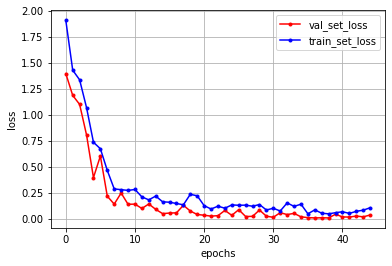

In [23]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_loss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()